In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import sklearn.cross_decomposition as cv
import sklearn

In [2]:
dataset = fetch_california_housing()
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [3]:
X.shape, y.shape

((20640, 8), (20640,))

In [4]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
# Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)
train_score_LR = LR.score(X_train, y_train)
print(f"The train score for Linear Regression model is {train_score_LR}")

The train score for Linear Regression model is 0.6090156808313738


In [6]:
# Lasso Regression model
lasso = Lasso(alpha = 0.1) # alpha = 0.1 ---> Percentage of penalty
lasso.fit(X_train, y_train)
train_score_ls = lasso.score(X_train, y_train)
print(f'The train score for lasso model is {train_score_ls}')

The train score for lasso model is 0.5488267992849574


In [7]:
# Ridge Regression model
ridgeReg = Ridge(alpha=0.1)
ridgeReg.fit(X_train, y_train)
train_score_ridge = ridgeReg.score(X_train, y_train)
print(f'The train score for ridge model is {train_score_ridge}')

The train score for ridge model is 0.6090156804624769


In [8]:
elasticNet = ElasticNet(alpha=0.1).fit(X_train, y_train)
train_score_en = elasticNet.score(X_train, y_train)
print(f'The train score for ElasticNet model is {train_score_en}')

The train score for ElasticNet model is 0.5797162482125511


In [9]:
# Testing model on testing dataset
test_score_LR = LR.score(X_test, y_test)
test_score_ls = lasso.score(X_test, y_test)
test_score_ridge = ridgeReg.score(X_test, y_test)
test_score_en = elasticNet.score(X_test, y_test)
result = pd.DataFrame({'LR': [train_score_LR, test_score_LR],
                      'Lasso': [train_score_ls, test_score_ls],
                      'Ridge': [train_score_ridge, test_score_ridge],
                      'ElasticNet':[train_score_en, test_score_en]}, index = ['Train_score','Test_score'])

In [10]:
result

,LR,Lasso,Ridge,ElasticNet
Train_score,0.609016,0.548827,0.609016,0.579716
Test_score,0.594579,0.523638,0.594578,0.557387


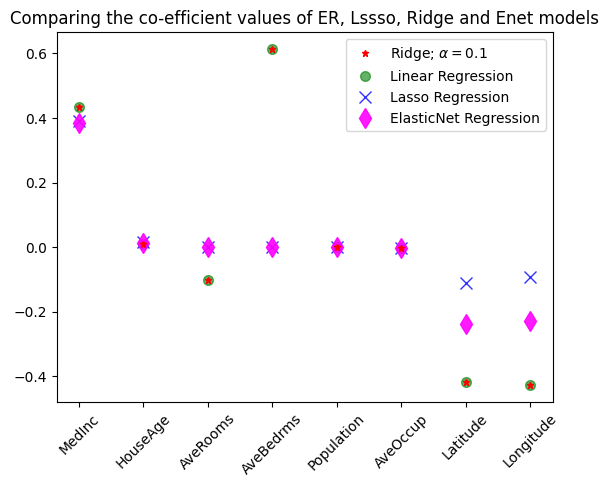

In [11]:
# Let's plot the co-efficients for all the 4 regression models
# plt.figure(figsize=(6,6))
plt.plot(dataset.feature_names, ridgeReg.coef_, alpha = 1, linestyle = 'none', 
        marker = '*', markersize = 5, c = 'red', label = r'Ridge; $\alpha = 0.1$', zorder = 7)
plt.plot(dataset.feature_names, LR.coef_, alpha = 0.6, linestyle = 'none', 
        marker = 'o', markersize = 7, c = 'green', label = 'Linear Regression')
plt.plot(dataset.feature_names, lasso.coef_, alpha = 0.8, linestyle = 'none', 
        marker = 'x', markersize = 9, c = 'blue', label = 'Lasso Regression')
plt.plot(dataset.feature_names, elasticNet.coef_, alpha = 0.9, linestyle = 'none', 
        marker = 'd', markersize = 10, c = 'magenta', label = 'ElasticNet Regression')
plt.xticks(rotation = 45)
plt.title('Comparing the co-efficient values of ER, Lssso, Ridge and Enet models')
plt.legend()
plt.show()

## Using Cross Validation

In [12]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

#### Lasso Cross Validation

In [13]:
lasso_cv = LassoCV(alphas=[0.0001, 0.0002, 0.0009, 0.001, 0.002, 0.003, 0.0035, 0.0003, 0.01, 0.1, 1, 10], random_state=10).fit(X_train,y_train)
print(f'Training score: {lasso_cv.score(X_train, y_train)}')
print(lasso_cv.alpha_)

Training score: 0.6088668691740275
0.002


#### Ridge Cross Validation

In [14]:
ridge_cv = RidgeCV(alphas=[0.0001, 0.001, 0.002, 0.01, 0.02, 0.1, 1, 10, 10.5, 11, 12, 15, 17, 19, 50, 100, 150]).fit(X_train,y_train)
print(f'Training score: {ridge_cv.score(X_train, y_train)}')
print(ridge_cv.alpha_)

Training score: 0.6087460107958624
100.0


#### ElasticNet Cross Validation

In [15]:
enet_cv = ElasticNetCV(alphas=[0.0001, 0.0002, 0.0009, 0.001, 0.002, 0.003, 0.0035, 0.0003, 0.01, 0.1, 1, 10], random_state=10).fit(X_train,y_train)
print(f'Training score: {enet_cv.score(X_train, y_train)}')
print(enet_cv.alpha_)

Training score: 0.6087765684477331
0.0035


In [16]:
# fitting a lasso regressor for every alpha value
alpha = np.logspace(-4,-1,10)
np.empty_like(alpha)
print(alpha)

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]


In [17]:
alphas = np.logspace(-4,-1,10)
scores = np.empty_like(alphas)

for i,a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_train, y_train)
print(scores)

[0.60901531 0.60901395 0.60900767 0.60897848 0.608843   0.60821409
 0.60529465 0.59836632 0.58788991 0.5488268 ]


0.03432308935225837


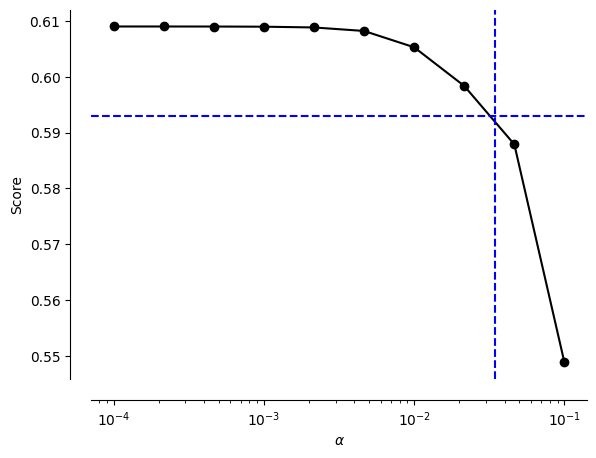

In [18]:
# comparing alpha values with scores
lassocv = LassoCV(random_state=0)
lassocv.fit(X_train, y_train)
lassocv_score = lassocv.score(X_train, y_train)
lassocv_alpha = lassocv.alpha_
print(lassocv_alpha)
# print('CV', lassocv.coef_)
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color = 'b', ls='--')
plt.axvline(lassocv_alpha, color = 'b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

### 

## Model Tuning

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas = np.logspace(-3, 1, num=30)

model = make_pipeline(StandardScaler(), RidgeCV(alphas = alphas))
cv_results = cross_validate(model, X_train, y_train, return_estimator=True, n_jobs=2)
print(cv_results)

{'fit_time': array([0.05641031, 0.05641031, 0.06291819, 0.06291819, 0.0498879 ]), 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.01301312]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-

In [20]:
score = cv_results['test_score']
print(score)
print(f'R2 score: {score.mean():.3f} ± {score.std():.3f}')

[0.63949534 0.60571284 0.61115815 0.56191319 0.60883357]
R2 score: 0.605 ± 0.025


In [21]:
alphas = np.logspace(-3, 1, num=30)

model = make_pipeline(StandardScaler(), ElasticNetCV(alphas = alphas))
cv_results = cross_validate(model, X_train, y_train, return_estimator=True, n_jobs=2)
print(cv_results) 

{'fit_time': array([0.07813787, 0.07813787, 0.09417152, 0.07854629, 0.06291699]), 'score_time': array([0.        , 0.        , 0.        , 0.01562452, 0.01562428]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.373823

In [22]:
score = cv_results['test_score']
print(score)
print(f'R2 score: {score.mean():.3f} ± {score.std():.3f}')

[0.63743739 0.60518845 0.61003564 0.56258959 0.60863722]
R2 score: 0.605 ± 0.024


In [24]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id = 186)

In [32]:
# data (as pandas dataframe)
X = wine_quality.data.features
y = wine_quality.data.targets
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [33]:
# metadata 
wine_quality.metadata

{'uci_id': 186,
 'name': 'Wine Quality',
 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality',
 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv',
 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).',
 'area': 'Business',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 4898,
 'num_features': 11,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['quality'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2009,
 'last_updated': 'Wed Nov 15 2023',
 'dataset_doi': '10.24432/C56S3T',
 'creators': ['Paulo Cortez',
  'A. Cerdeira',
  'F. Almeida',
  'T. Matos',
  'J. Reis'],
 'intro_paper': {'title': 'Modeling wine preferences 

In [34]:
# variable information
wine_quality.variables

,name,role,type,demographic,description,units,missing_values
0,fixed_acidity,Feature,Continuous,None,None,None,no
1,volatile_acidity,Feature,Continuous,None,None,None,no
2,citric_acid,Feature,Continuous,None,None,None,no
3,residual_sugar,Feature,Continuous,None,None,None,no
4,chlorides,Feature,Continuous,None,None,None,no
5,free_sulfur_dioxide,Feature,Continuous,None,None,None,no
6,total_sulfur_dioxide,Feature,Continuous,None,None,None,no
7,density,Feature,Continuous,None,None,None,no
8,pH,Feature,Continuous,None,None,None,no
9,sulphates,Feature,Continuous,None,None,None,no
